In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np 
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'  # Graphics in SVG format are more sharp and legible

Let's load the dataset into a dataframe, 

In [2]:
df = pd.read_csv('datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5).T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharge         7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharge         0
Churn               0
dtype: int64

Looks like we don't need the `customerID` column, and the data in other columns needs to be converted into categorical type in order to make any predictions,

In [5]:
df.drop('customerID', axis=1, inplace=True)
df.head(8).T

,0,1,2,3,4,5,6,7
gender,Female,Male,Male,Male,Female,Female,Male,Female
SeniorCitizen,0,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No,No
Dependents,No,No,No,No,No,No,Yes,No
tenure,1,34,2,45,2,8,22,10
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes
OnlineBackup,Yes,No,Yes,No,No,No,Yes,No


In [6]:
new_df = df.iloc[:, :-3]

df_cat = pd.get_dummies(new_df)
df_cat.head(7).T

,0,1,2,3,4,5,6
SeniorCitizen,0,0,0,0,0,0,0
tenure,1,34,2,45,2,8,22
gender_Female,1,0,0,0,1,1,0
gender_Male,0,1,1,1,0,0,1
Partner_No,0,1,1,1,1,1,1
Partner_Yes,1,0,0,0,0,0,0
Dependents_No,1,1,1,1,1,1,0
Dependents_Yes,0,0,0,0,0,0,1
PhoneService_No,1,0,0,1,0,0,0
PhoneService_Yes,0,1,1,0,1,1,1


In [7]:
temp = df_cat['tenure'] 
df_cat.drop('tenure', axis=1, inplace=True)

df_cat['tenure'] = temp
df_cat['TotalCharges'] = df['TotalCharge']
df_cat['Churn'] = df['Churn']

df_cat.replace(to_replace='Yes', value=1, inplace=True)
df_cat.replace(to_replace='No', value=0, inplace=True)


In [8]:
df_cat.head(5).T

,0,1,2,3,4
SeniorCitizen,0.00,0.0,0.00,0.00,0.00
gender_Female,1.00,0.0,0.00,0.00,1.00
gender_Male,0.00,1.0,1.00,1.00,0.00
Partner_No,0.00,1.0,1.00,1.00,1.00
Partner_Yes,1.00,0.0,0.00,0.00,0.00
Dependents_No,1.00,1.0,1.00,1.00,1.00
Dependents_Yes,0.00,0.0,0.00,0.00,0.00
PhoneService_No,1.00,0.0,0.00,1.00,0.00
PhoneService_Yes,0.00,1.0,1.00,0.00,1.00
MultipleLines_No,0.00,1.0,1.00,0.00,1.00


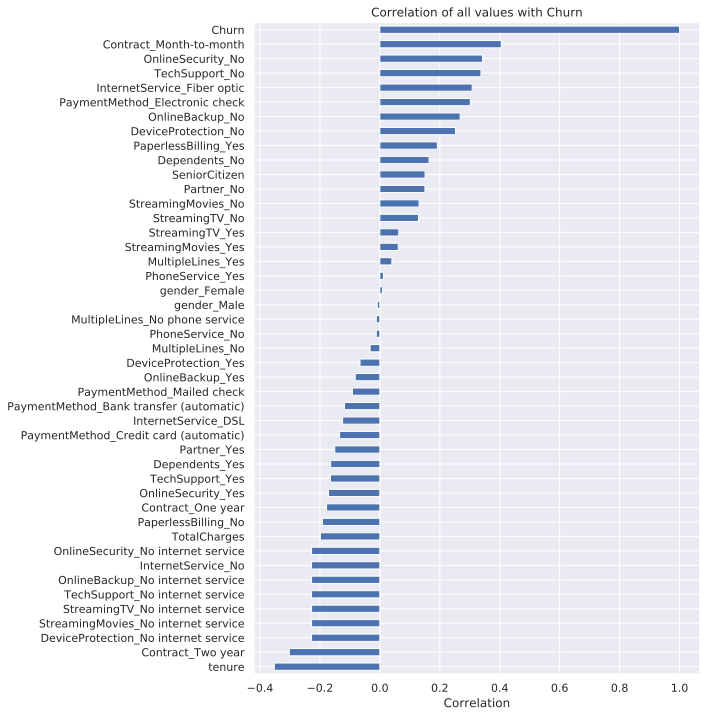

In [9]:
plt.figure(figsize=(8, 12))
df_cat.corr()['Churn'].sort_values().plot(kind='barh')
plt.title('Correlation of all values with Churn')
plt.xlabel('Correlation')
plt.show()
plt.close()

From this, we can say that Month to month contracts, no online security, no online backup, no tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Surprisingly, Online security, streaming , online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations before we start building the model and identifying the important variables. 

First we will try to understand distributions depending on age, gender, dependents, and partner status

In [10]:
df['gender'].value_counts() / len(df)  * 100  # Distribution of gender

Male      50.47565
Female    49.52435
Name: gender, dtype: float64

In [11]:
df['SeniorCitizen'].value_counts() / len(df)  * 100  # Percentage of SeniorCitizen

0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64

So there are only about 16 % senior citizens customers

In [12]:
df['Partner'].value_counts() / len(df)  * 100  # Percentage of people having Partners

No     51.69672
Yes    48.30328
Name: Partner, dtype: float64

In [13]:
df['Dependents'].value_counts() / len(df)  * 100  # Percentage of people having Dependents

No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64

About 48 % of the customers have a partners, and nearly 30 % of the total customers have dependents. 

Let's see how many customers who have partners also have depenedents, 

In [14]:
dependet_partners = df.groupby(['Partner', 'Dependents']).size().unstack()
dependet_partners *100 / dependet_partners.T.sum()

Dependents,No,Yes
Partner,,
No,90.085141,10.611405
Yes,45.399615,51.410935


From this, 51 % customers who have partners also have dependents.

Now, we will try to understand the customer's account information like tenure and contrat details,

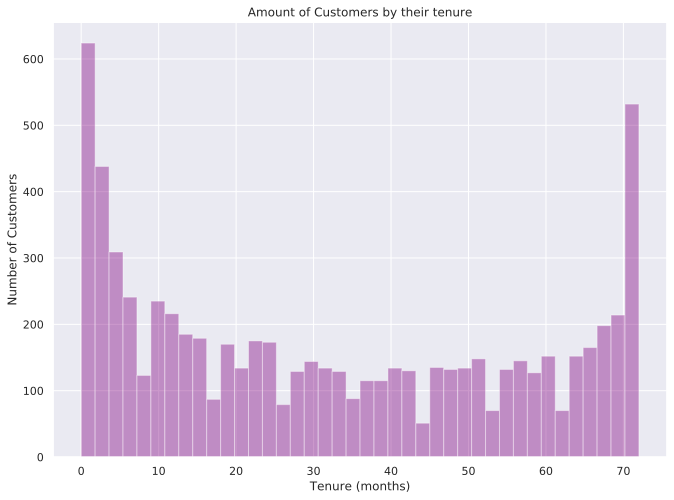

In [15]:
plt.figure(figsize=(11, 8))
sns.distplot(df['tenure'],
             hist=True,
             bins=120//3,
             kde=False,
             color = 'purple')
plt.ylabel('Number of Customers')
plt.xlabel('Tenure (months)')
plt.title('Amount of Customers by their tenure')
plt.show()
plt.close()

From this histogram we can say, a lot of customers have been with the telecom company for just a month, and a many are there for nearly about 70 months. 

This might be because of the different customers having different type of contracts. 

So, based on the contract it is more/less easier for the customers to stay/leave the telecom company.

Now, to understand this distribution from above histogram more clearly, let's look at the customers with different contract types,

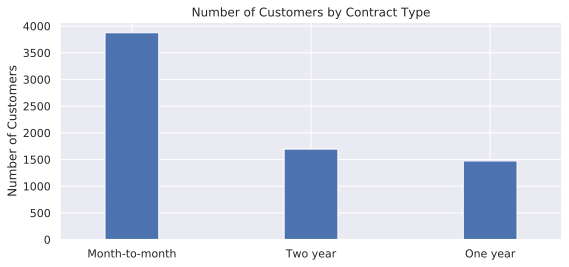

In [16]:
plt.figure(figsize=(9, 4))
df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Contract Type')
plt.show()
plt.close()

Text(0.5, 1.0, 'One year Contract')

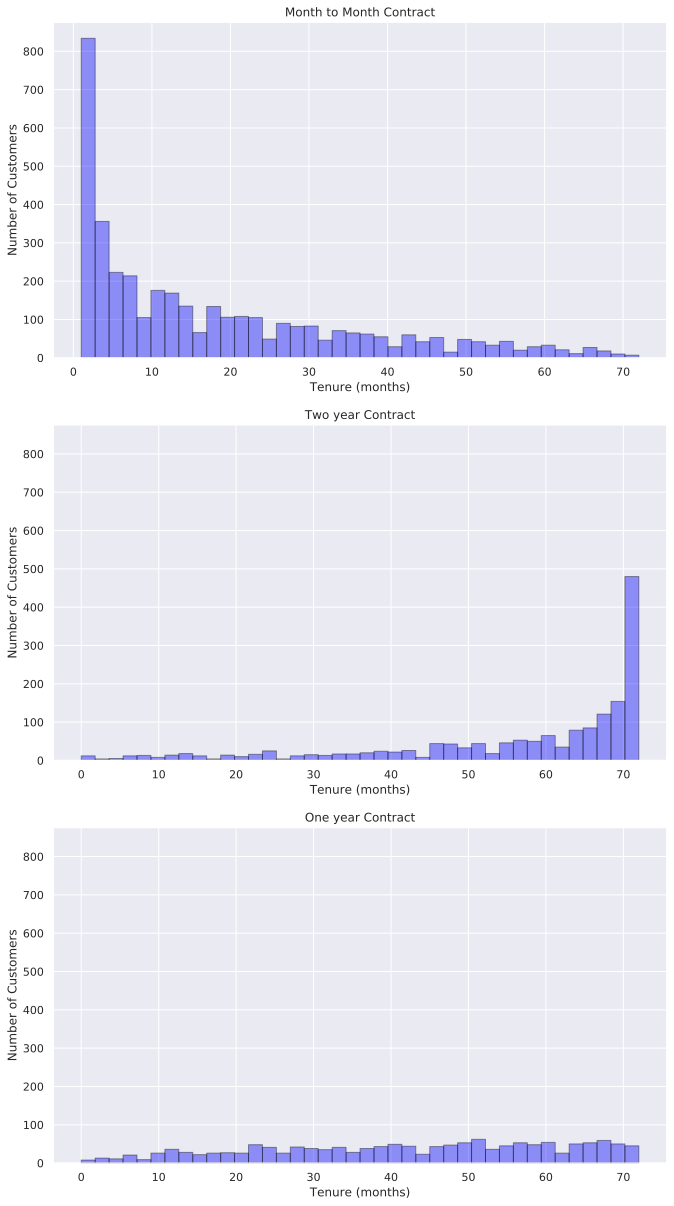

In [17]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, sharey=True, figsize=(11, 21))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=120//3, color = 'blue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                   ax=ax1)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=120//3, color = 'blue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                   ax=ax2)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Two year Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=120//3, color = 'blue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                   ax=ax3)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('One year Contract')

Clearly, most of the monthly contracts last for just 1-2 months, and the 2 year contracts tend to last longer for about 70 months. 

This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

This is also what we saw in the earlier chart on correlation with the churn rate.


Now, let's take a look at our prediction variable `Churn`, and understand the churn rate and it's interaction with other variables,

In [18]:
df['Churn'].value_counts()*100.0 / len(df)  # Percentage of customers reataining with the company

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

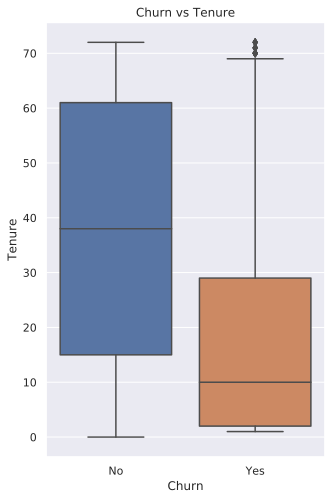

In [19]:
plt.figure(figsize=(5, 8))
sns.boxplot(x = df.Churn, y = df.tenure)
plt.ylabel('Tenure')
plt.title('Churn vs Tenure')
plt.show()
plt.close()

In [20]:
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack()
contract_churn.T*100.0 / contract_churn.T.sum()

Contract,Month-to-month,One year,Two year
Churn,,,
No,57.290323,88.730482,97.168142
Yes,42.709677,11.269518,2.831858


This clearly shows, the customers with lower tenure tend to churn more and vice versa.

Let's look at Churn rate for senior citizens, monthly and total charges,

In [21]:
seniority_churn = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
seniority_churn.T*100.0 / seniority_churn.T.sum()

SeniorCitizen,0,1
Churn,,
No,76.393832,58.318739
Yes,23.606168,41.681261


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

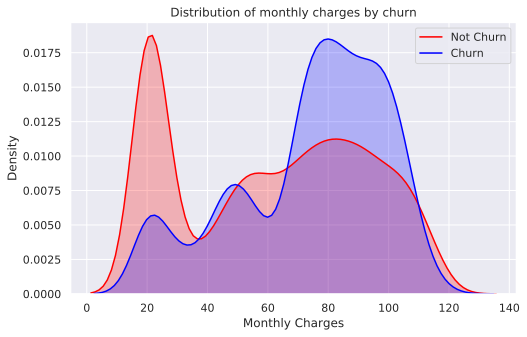

In [22]:
plt.figure(figsize=(8, 5))
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of total charges by churn')

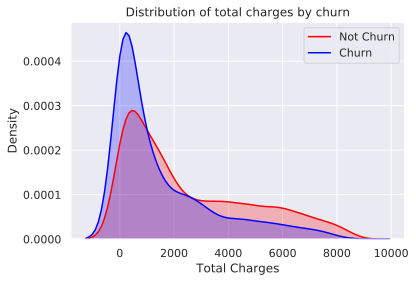

In [23]:
ax = sns.kdeplot(df.TotalCharge[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.TotalCharge[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

It seems that, senior citizen tend to churn more than young customers.

Also as the monthly charges and total charges increase, customers are more likely to churn,

Now let's build few predictive models and compare them to find the best one.

The task here will be to classify whether or not the customer will churn,  so we will have to scale our input values between 0 and 1

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [25]:
y = df_cat['Churn'].values
X = df_cat.drop(columns = ['Churn'])

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Logistic Regression

In [26]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

pred_log_reg = log_reg.predict(X_test)
print(metrics.accuracy_score(y_test, pred_log_reg))

# To get the weights of all the variables
weights = pd.Series(log_reg.coef_[0], index=X.columns.values)

0.7991483321504613


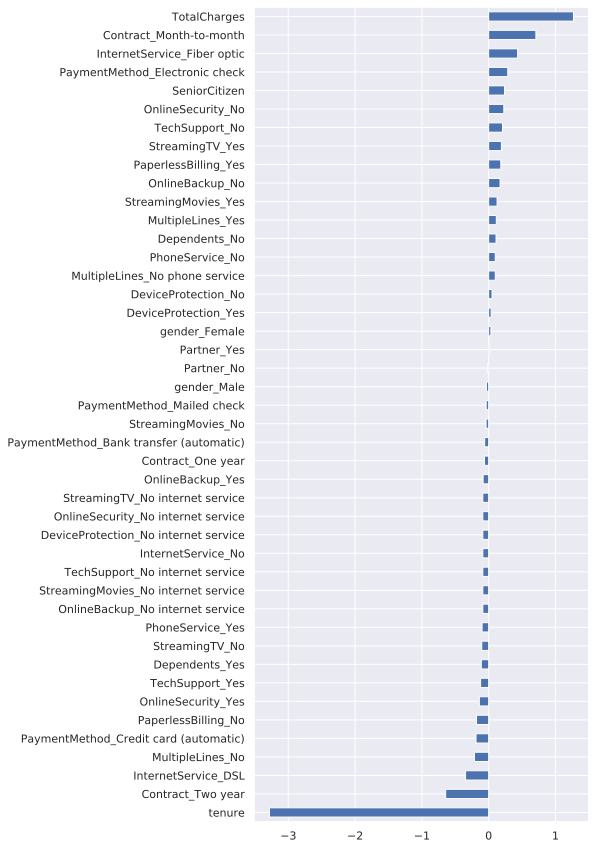

In [27]:
plt.figure(figsize=(6, 15))
weights.sort_values().plot(kind='barh')

As we can see, some variables are negatively correlated with the predicted variable (Churn), while some have positively. Negative correlation means that likeliness of churn decreases with that variable. 

Let me interpret some findings from above plot,

1. As we have seen in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions.


2. Total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. 

I don't understad why this is happening.

Till the time let's have a look at other algorithms.

### Random Forest

0.7892122072391767


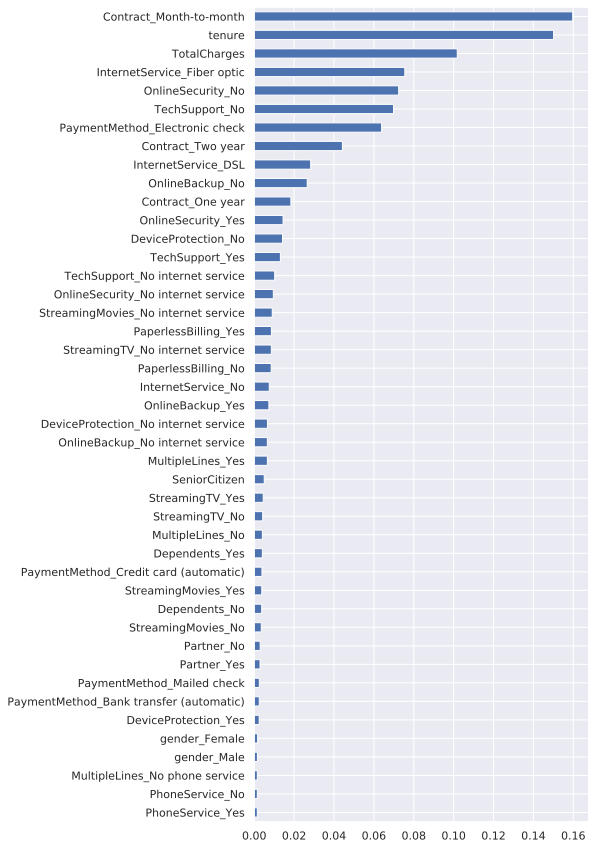

In [28]:
rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
rf.fit(X_train, y_train)

# Make predictions
pred_rf = rf.predict(X_test)
print(metrics.accuracy_score(y_test, pred_rf))

importances = rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
plt.figure(figsize=(6, 15))
weights.sort_values().plot(kind = 'barh')


1. From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.


2. The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

### SVM

In [29]:
model_svm = SVC(kernel='linear') 
model_svm.fit(X_train,y_train)
pred_svm = model_svm.predict(X_test)
metrics.accuracy_score(y_test, pred_svm)

0.8019872249822569

### Ada Boost

In [30]:
model = AdaBoostClassifier()
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7955997161107168

### XG Boost

In [31]:
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8026969481902059

With XG Boost, I am able to achieve the slightly higher than all accuracy on test data to almost 80.27%

But clearly there's alot to be explored from this dataset.